In [2]:
__author__ = "Lola-Marie Moron, Sandra Fouzari, Danila Kilin"
__credits__ = ["Lola-Marie Moron", "Sandra Fouzari", "Danila Kilin"]
__version__ = "1.0.1"
__maintainer__ = "Lola-Marie Moron, Sandra Fouzari, Danila Kilin"
__email__ = "lola-marie.moron@edu.devinci.fr"
__status__ = "Development"

In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Table of Contents
* [Première partie](#chapter1)
    * [Chargement des données](#section_1_1)
    * [Exploration de la donnée](#section_1_2)

# Première partie <a class="anchor" id="chapter1"></a>

## Chargement des données <a class="anchor" id="section_1_1"></a>

In [4]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
df.groupby('CAEC').agg(nb_values=('CAEC','count'))

,nb_values
CAEC,
Always,53
Frequently,242
Sometimes,1765
no,51


In [10]:
df.groupby('MTRANS').agg(nb_values=('MTRANS','count'))

,nb_values
MTRANS,
Automobile,457
Bike,7
Motorbike,11
Public_Transportation,1580
Walking,56


<AxesSubplot:xlabel='NObeyesdad'>

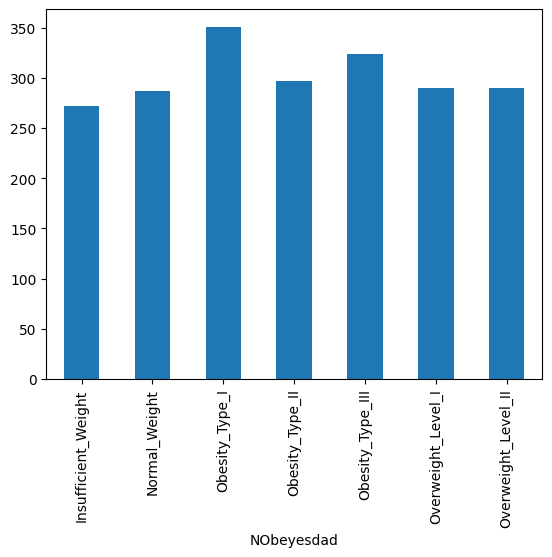

In [13]:
df_viz=df.groupby(['NObeyesdad']).size()
df_viz.plot(kind='bar')

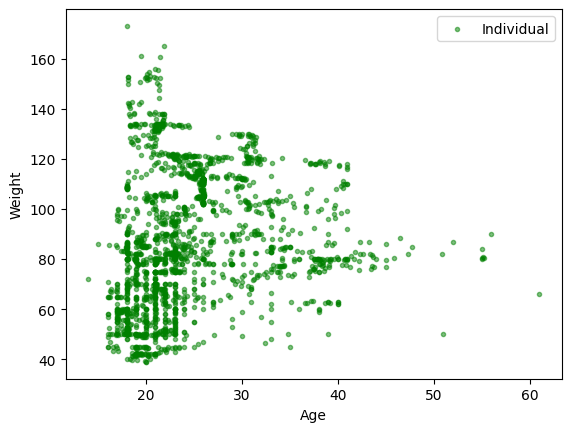

In [18]:
fig, ax = plt.subplots()
ax.scatter(df["Age"], df["Weight"], c="green", alpha=0.5, marker='.', label="Individual")
ax.set_xlabel("Age")
ax.set_ylabel("Weight")
ax.legend()
plt.show()

## Pre-processing

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
encoder = OneHotEncoder(sparse=False)

In [14]:
encoder.fit_transform(df[['MTRANS']])

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [18]:
encoder.categories_

['MTRANS']


In [11]:
encoder_df = pd.DataFrame(encoder.fit_transform(df[['MTRANS']]))

In [12]:
encoder_df

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,0.0,1.0,0.0


In [13]:
encoder_df.categories_

AttributeError: 'DataFrame' object has no attribute 'categories_'